# import package

In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as F
from sklearn.cluster import KMeans
import torch
from sklearn.metrics import silhouette_samples, silhouette_score

# read all mother wavelets

In [2]:
motherwavelets = []

In [3]:
for family in pywt.families():
    for mother in pywt.wavelist(family):
        motherwavelets.append(mother)

In [4]:
print(motherwavelets)

['haar', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'dmey', 'gaus1', 'gaus2', 'gaus3', 'gaus4'

In [5]:
len(motherwavelets)

127

## Visuialization of wavelets

<ipython-input-6-420074598e99>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-6-420074598e99>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-6-420074598e99>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-6-420074598e99>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])


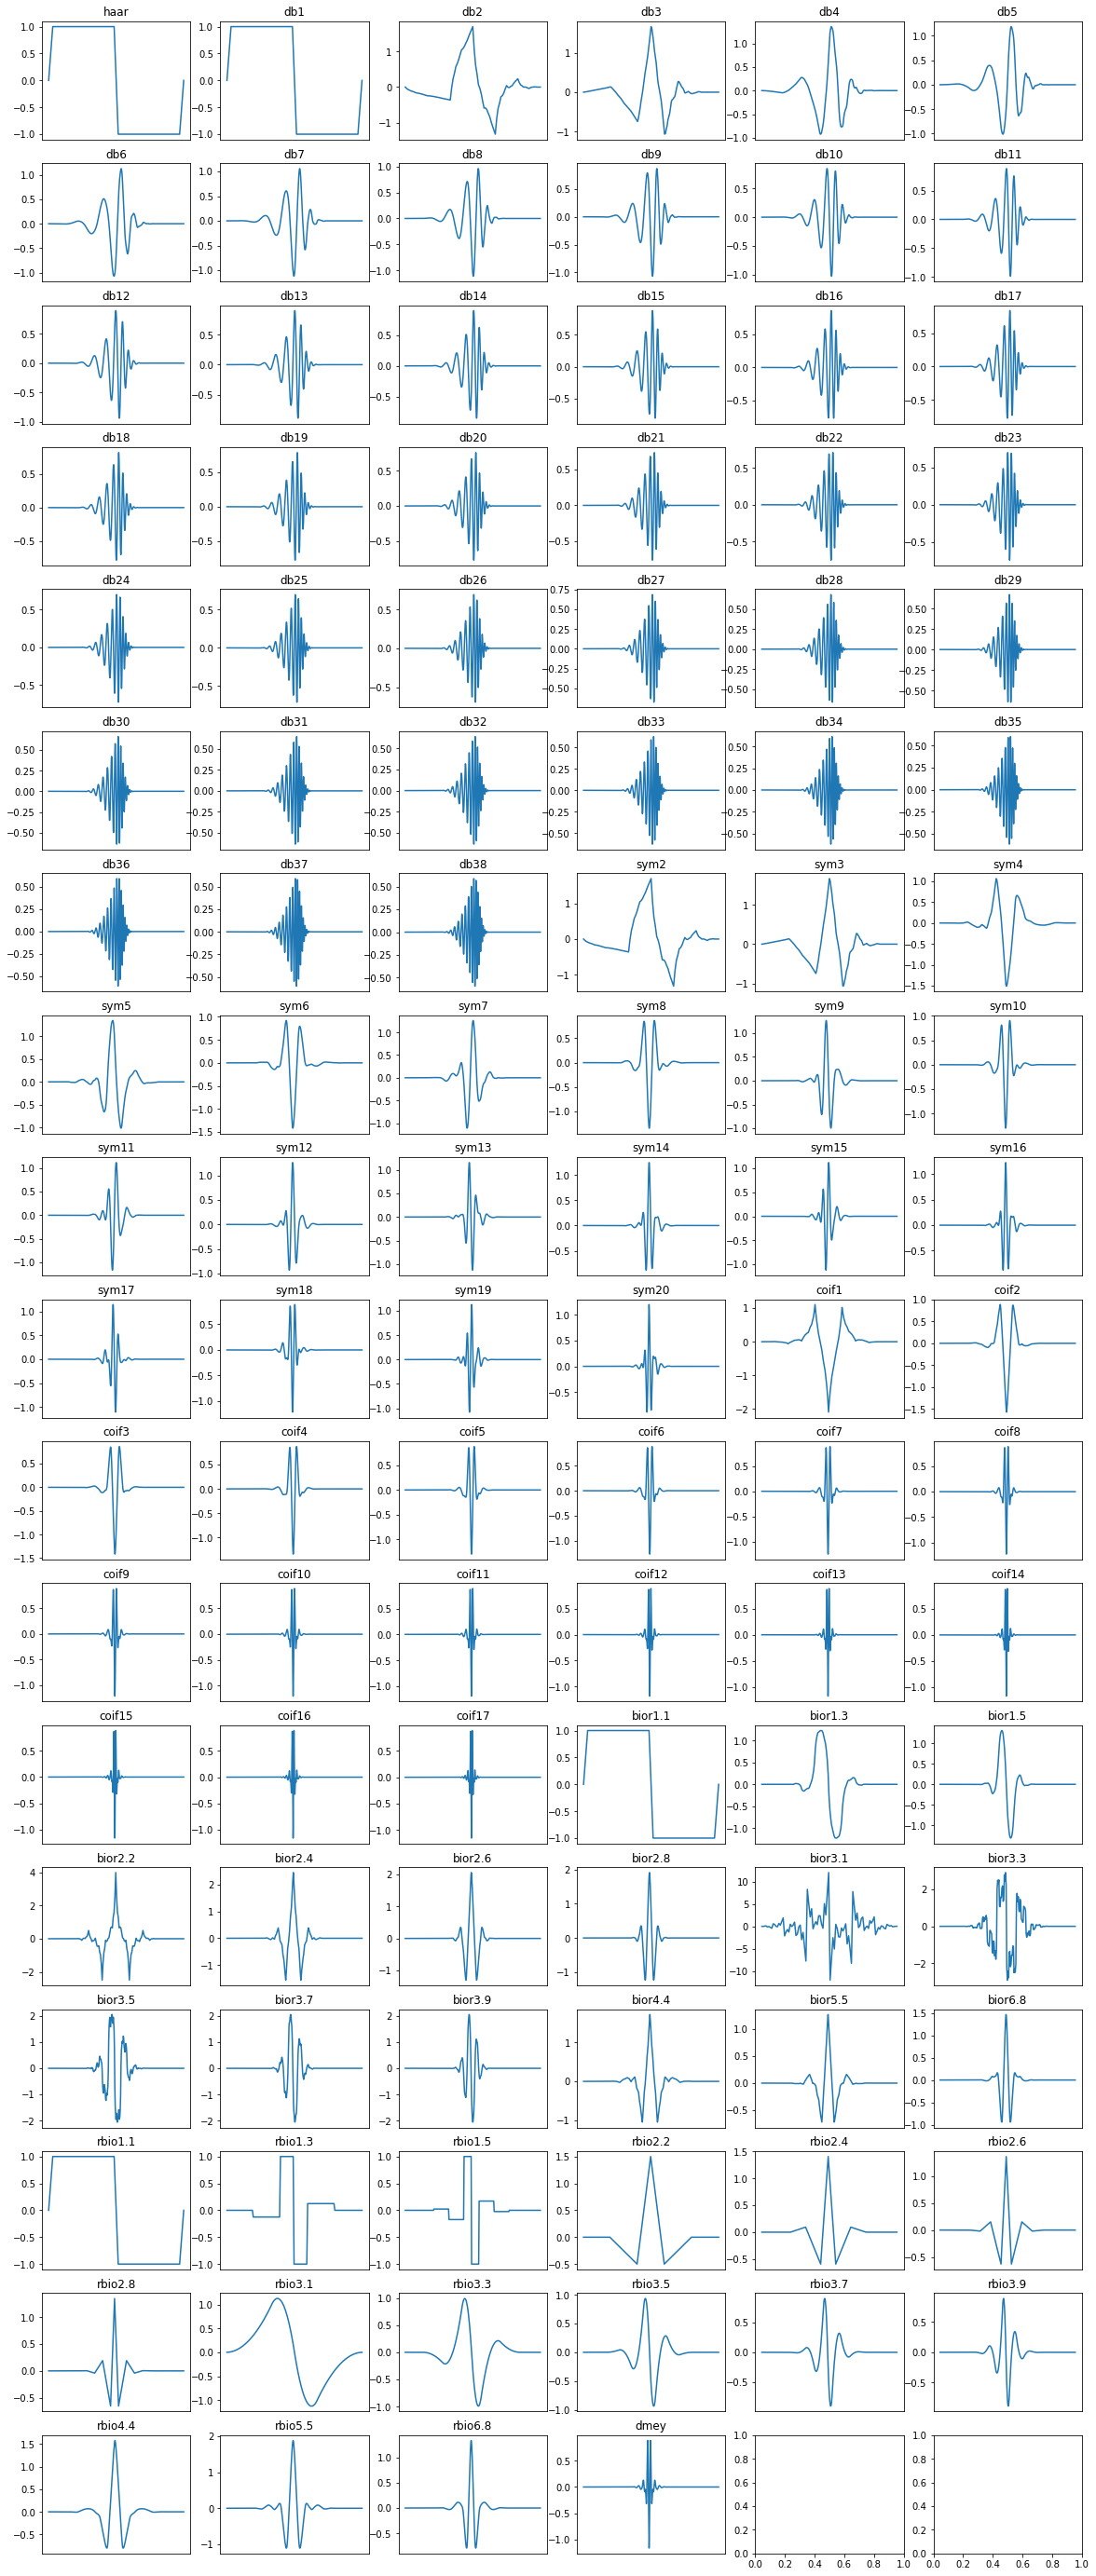

In [6]:
fig, ax = plt.subplots(nrows = 18, ncols=6, figsize=(20, 50)) #

idx = 0
for i in range(18):
    for j in range(6):
        if idx < 127:
            mw_temp = motherwavelets[idx]
            if mw_temp.startswith('gaus') or mw_temp.startswith('mexh') or mw_temp.startswith('morl') or mw_temp.startswith('cmor') or mw_temp.startswith('fbsp') or mw_temp.startswith('shan') or mw_temp.startswith('cgau'):
                continue
            else:
                param = pywt.Wavelet(mw_temp).wavefun(level=5)
                psi, x = param[1], param[-1]

            idx += 1
            ax[i,j].plot(x, np.real(psi))
            ax[i,j].set_title(mw_temp)
            ax[i,j].set_xticks([],[])
#plt.savefig(f'./figures for filter/1 mother wavelets.pdf', format='pdf', bbox_inches='tight')

## Uniform the dimensionality of all wavelets, e.g., normalization

<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])


<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-7-b6668f8c47c4>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])


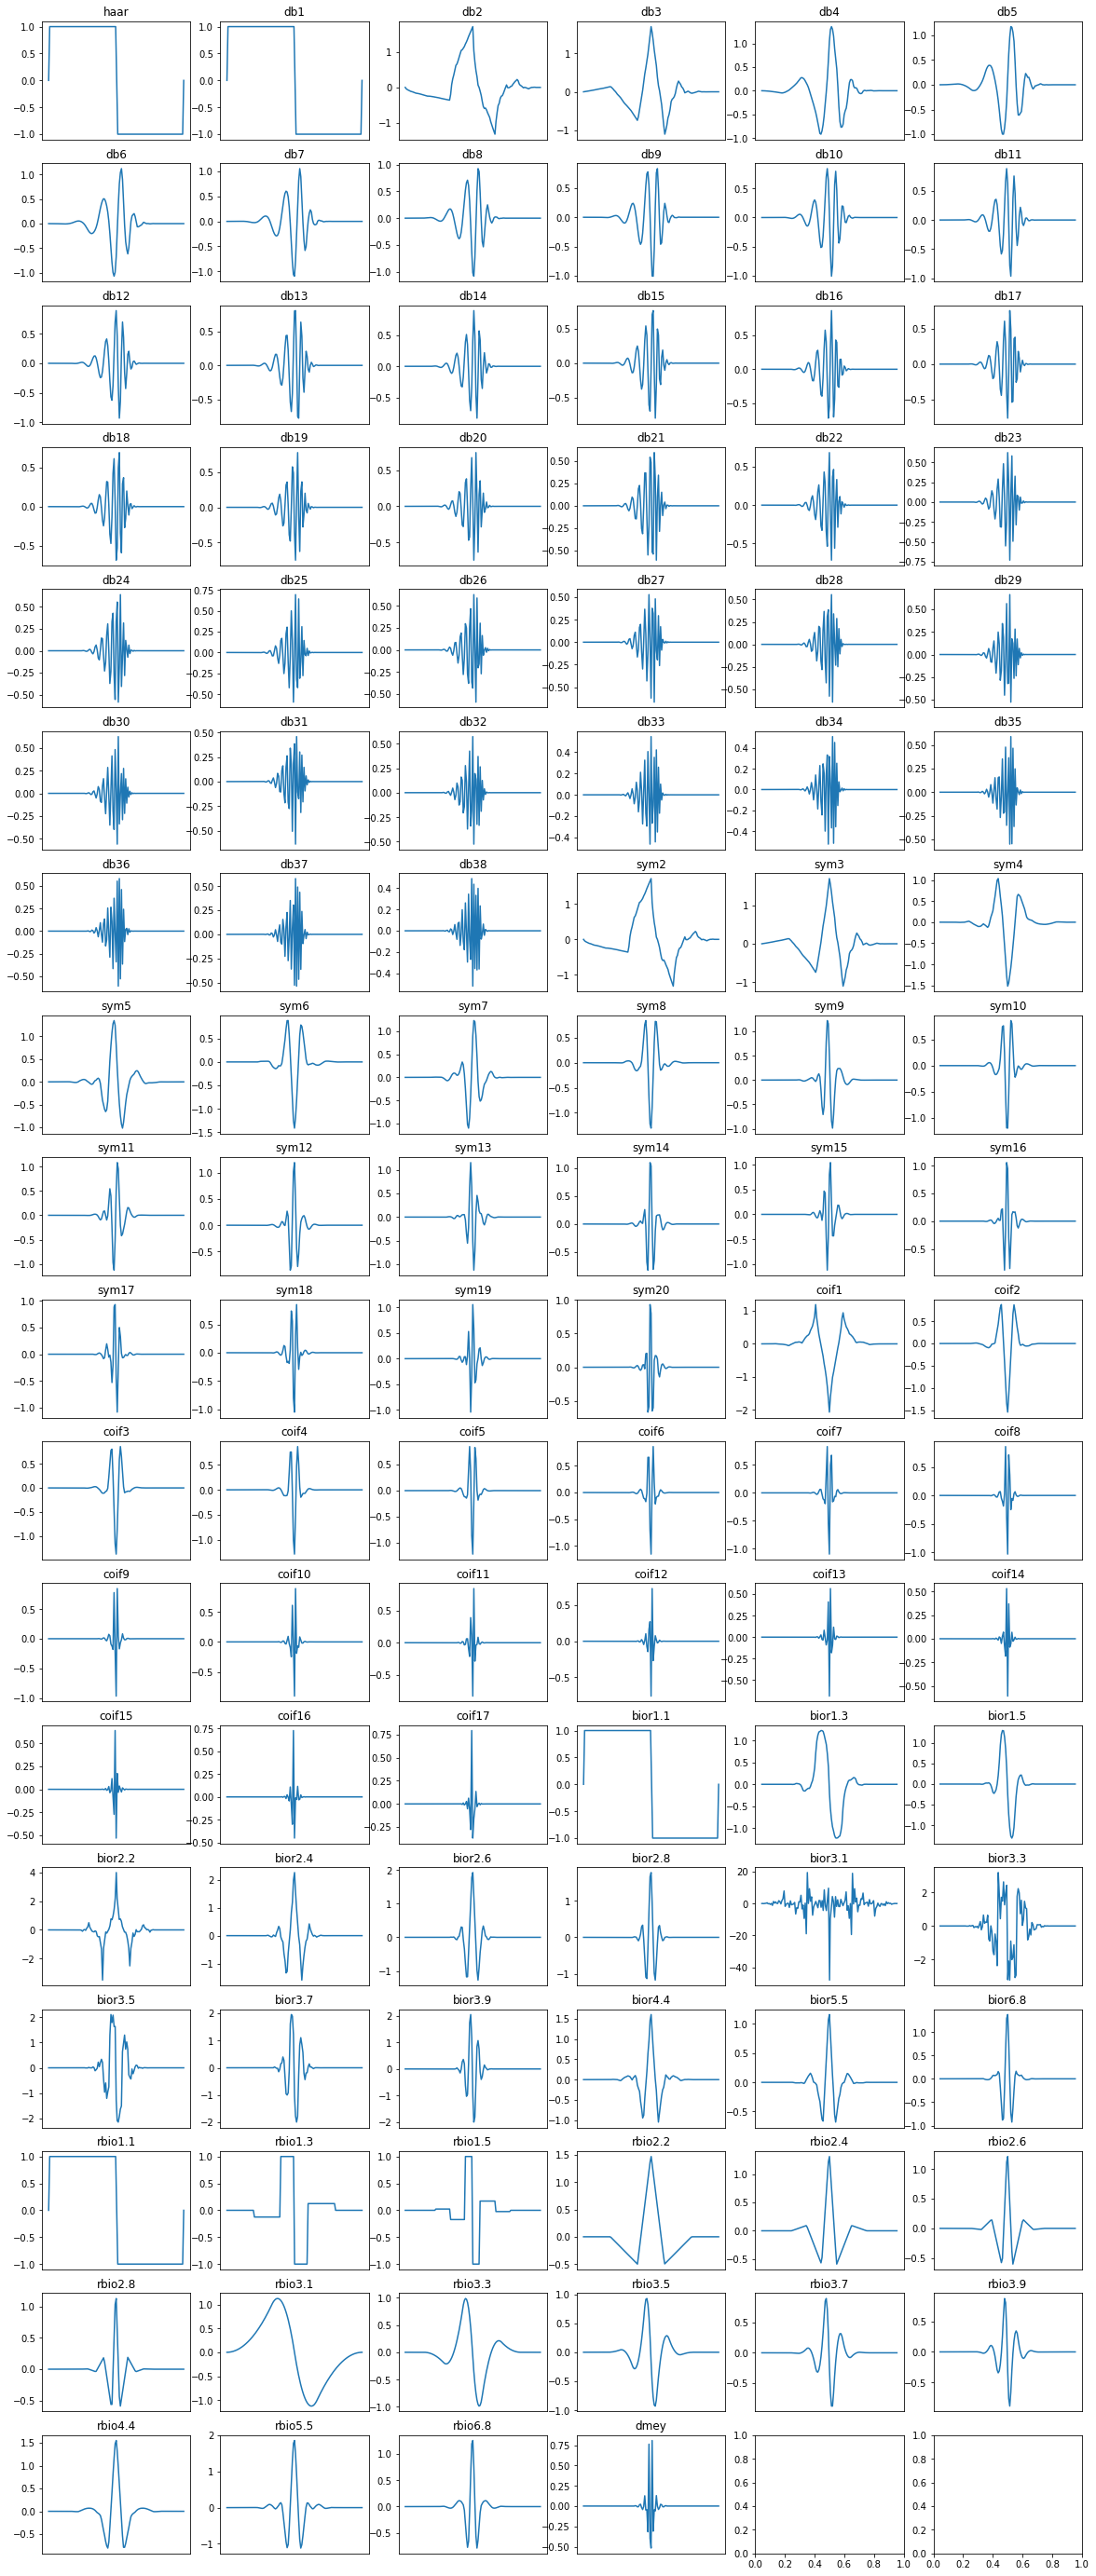

In [7]:
X = np.zeros([1,129])
PSI = np.zeros([1,129])

fig, ax = plt.subplots(nrows = 18, ncols=6, figsize=(20, 50)) #

idx = 0
for i in range(36):
    for j in range(6):
        if idx < 127:
            mw_temp = motherwavelets[idx]
            if mw_temp.startswith('gaus') or mw_temp.startswith('mexh') or mw_temp.startswith('morl') or mw_temp.startswith('cmor') or mw_temp.startswith('fbsp') or mw_temp.startswith('shan') or mw_temp.startswith('cgau'):
                continue
            else:
                param = pywt.Wavelet(mw_temp).wavefun(level=7)
                psi, x = param[1], param[-1]
                
                idx_ds = np.round(np.linspace(0, x.shape[0]-1, 129)).astype(int)
                
                x = x[idx_ds]
                psi = psi[idx_ds]
                
                X = np.vstack((X, x.reshape(1,-1)))
                PSI = np.vstack((PSI, psi.reshape(1,-1)))

            idx += 1
            ax[i,j].plot(x, np.real(psi))
            ax[i,j].set_title(mw_temp)
            ax[i,j].set_xticks([],[])
#plt.savefig(f'./figures for filter/2 mother wavelets with down sampling.pdf', format='pdf', bbox_inches='tight')

X = X[1:,:]
PSI = PSI[1:,:]

# Wavelets clustering

## clustering by shape of wavelets

In [8]:
result = np.zeros([2,1]).reshape(2,1)
for k in range(5, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(PSI)
    label = kmeans.labels_
    silhouette_avg = silhouette_score(PSI, label)
    print(f'{k}-clusters has {silhouette_avg} score.')
    result = np.hstack((result, np.array([k,silhouette_avg]).reshape(2,1)))

5-clusters has 0.30934932599662857 score.
6-clusters has 0.27684784604237406 score.
7-clusters has 0.27925915449123034 score.
8-clusters has 0.22641569829059624 score.
9-clusters has 0.31158436663931416 score.
10-clusters has 0.3055063373079612 score.
11-clusters has 0.2563090959933967 score.
12-clusters has 0.25305444193673193 score.
13-clusters has 0.2719143080505459 score.
14-clusters has 0.2458660275543709 score.
15-clusters has 0.2390367573376075 score.
16-clusters has 0.25853291343451246 score.
17-clusters has 0.2560661351428061 score.
18-clusters has 0.25106098882049205 score.
19-clusters has 0.2554492695939899 score.
20-clusters has 0.2828985779930175 score.
21-clusters has 0.2709749326698156 score.
22-clusters has 0.26322112107480056 score.
23-clusters has 0.2674596952416692 score.
24-clusters has 0.2821182966221295 score.
25-clusters has 0.26100375623877436 score.
26-clusters has 0.2684895435600622 score.
27-clusters has 0.28037593273811345 score.
28-clusters has 0.2756296429

In [9]:
idx = np.argmax(result[1,:])
best_K = int(result[0,idx])
kmeans = KMeans(n_clusters=best_K, random_state=0).fit(PSI)
label = kmeans.labels_
best_K

9

<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],

<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-10-52978d1db4c1>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],

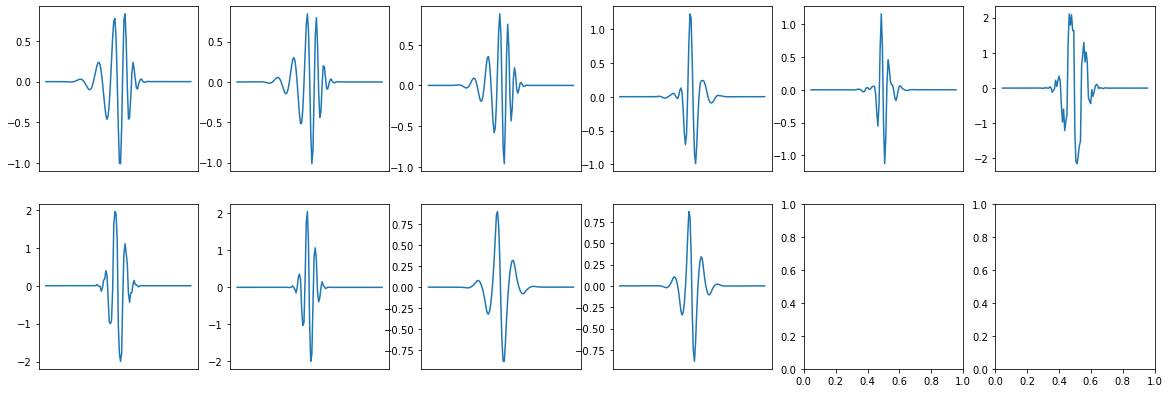

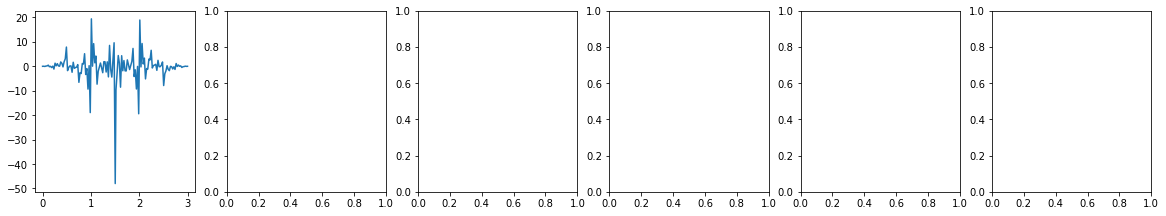

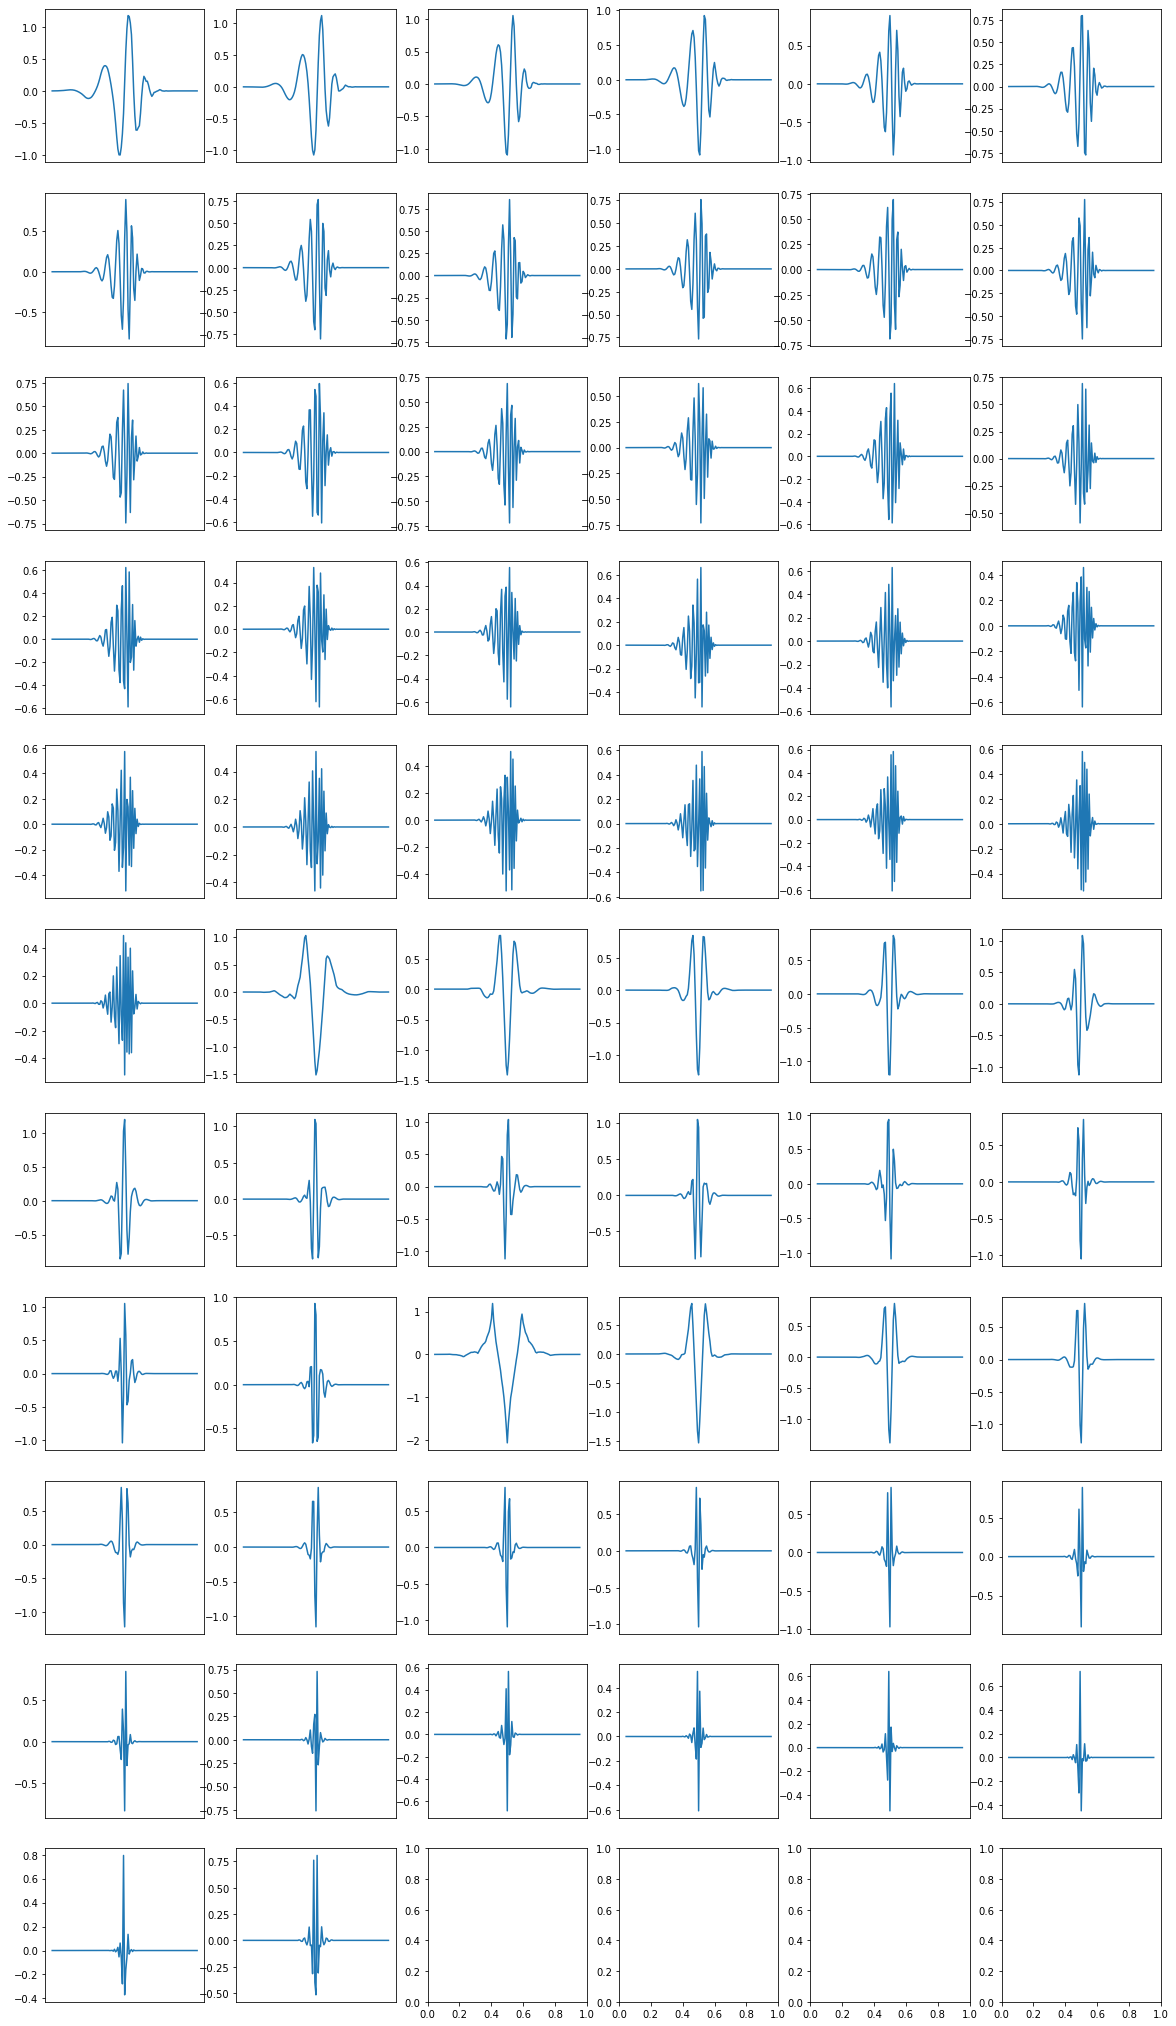

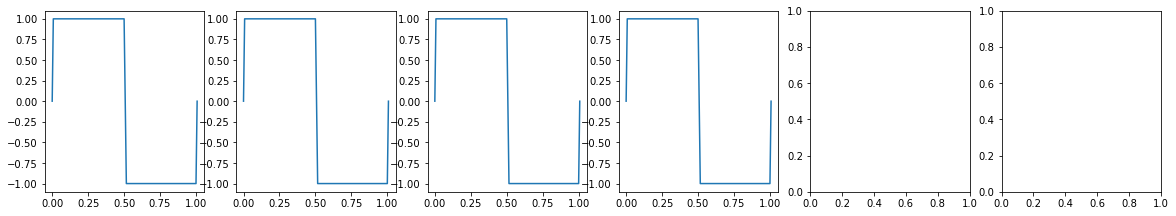

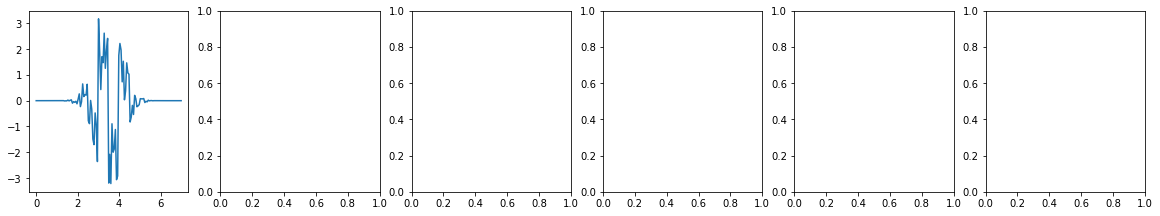

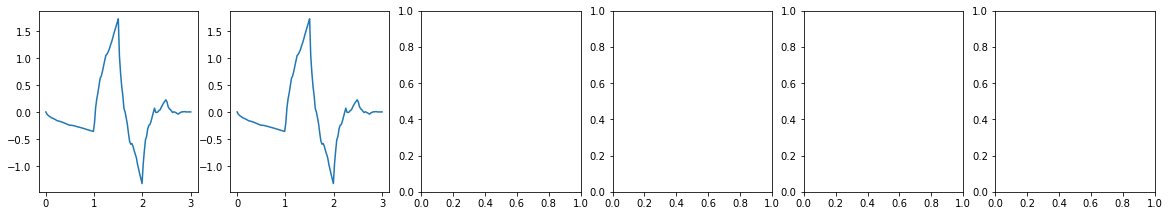

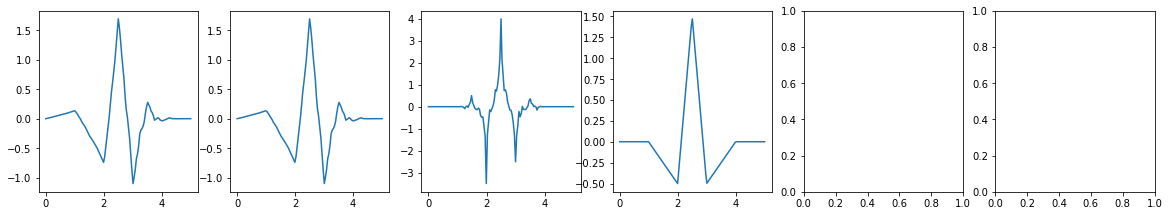

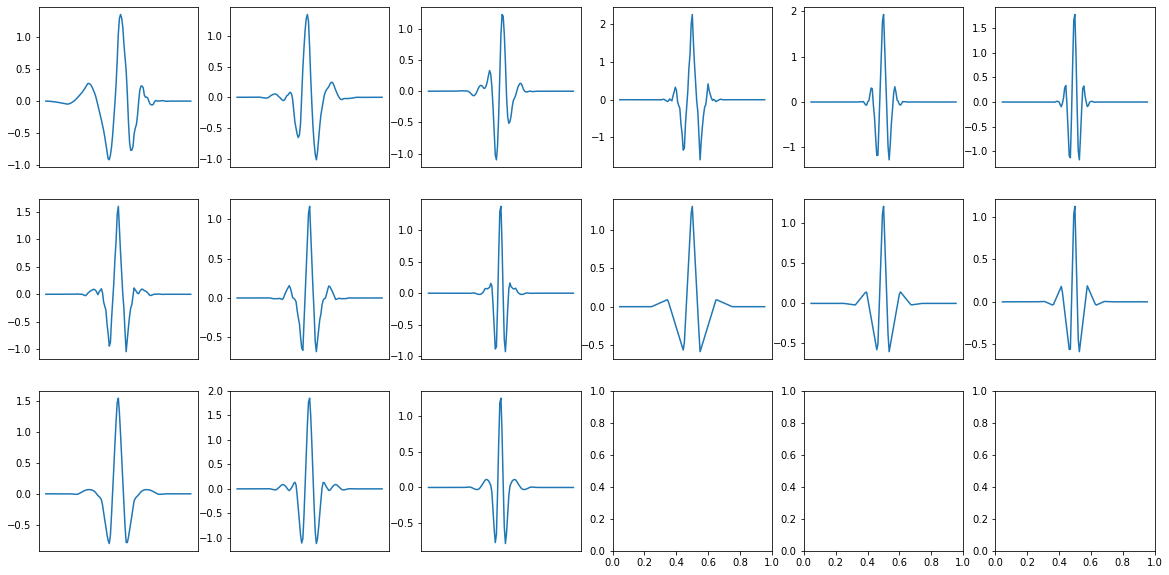

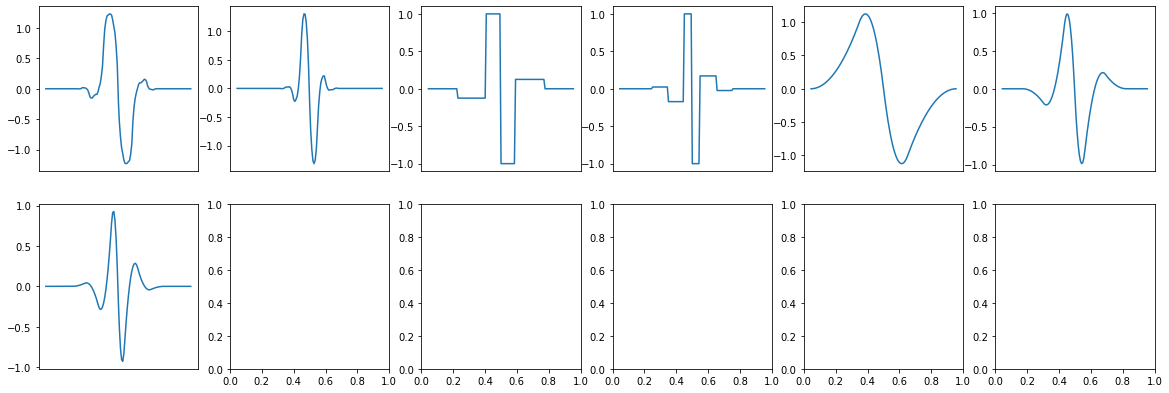

In [10]:
for k in range(best_K):
    wavesidxs = np.where(label==k)[0]
    n_row = np.ceil(len(wavesidxs)/6).astype(int)
    fig, ax = plt.subplots(nrows = n_row, ncols=6, figsize=(20, 20*n_row/6))
    i = 0
    j = 0
    for wavesidx in wavesidxs:
        x = X[wavesidx,:]
        psi = PSI[wavesidx,:]
        if n_row == 1:
            ax[j].plot(x, psi)
        else:
            ax[i,j].plot(x, psi)
            ax[i,j].set_xticks([],[])
        
        j += 1
        if j == 6:
            j = 0
            i += 1
    #plt.savefig(f'./figures for filter/3 grouped mothers by time/{k}-th group.pdf', format='pdf', bbox_inches='tight')

## clustering by shape + frequency

In [11]:
FRE = np.zeros([1,129])
for i in range(PSI.shape[0]):
    FRE = np.vstack((FRE, np.real(F.fft(PSI[i,:])).reshape(1,-1)))
FRE = FRE[1:,:]
PSI_extended = np.hstack((PSI, FRE))

In [12]:
result = np.zeros([2,1]).reshape(2,1)
for k in range(5, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(PSI_extended)
    label = kmeans.labels_
    silhouette_avg = silhouette_score(PSI_extended, label)
    print(f'{k}-clusters has {silhouette_avg} score.')
    result = np.hstack((result, np.array([k,silhouette_avg]).reshape(2,1)))

5-clusters has 0.37679030017539905 score.
6-clusters has 0.3979344730533042 score.
7-clusters has 0.3750009116394595 score.
8-clusters has 0.31438674035961955 score.
9-clusters has 0.32287538716629954 score.
10-clusters has 0.30921734660355016 score.
11-clusters has 0.2768761526351201 score.
12-clusters has 0.2784287607284063 score.
13-clusters has 0.24971968274698444 score.
14-clusters has 0.2653025850452262 score.
15-clusters has 0.2487661622667193 score.
16-clusters has 0.23924422136436524 score.
17-clusters has 0.24360575872859003 score.
18-clusters has 0.2824632167175783 score.
19-clusters has 0.29365763295549163 score.
20-clusters has 0.30238361349289117 score.
21-clusters has 0.2927536360860935 score.
22-clusters has 0.2988962565539077 score.
23-clusters has 0.29623756223325 score.
24-clusters has 0.3089178075808321 score.
25-clusters has 0.2905715516074522 score.
26-clusters has 0.28166390915583644 score.
27-clusters has 0.27484863033212625 score.
28-clusters has 0.305059802023

In [13]:
idx = np.argmax(result[1,:])
best_K = int(result[0,idx])
kmeans = KMeans(n_clusters=best_K, random_state=0).fit(PSI_extended)
label = kmeans.labels_
best_K

6

<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],

<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],[])
<ipython-input-14-62e180379491>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i,j].set_xticks([],

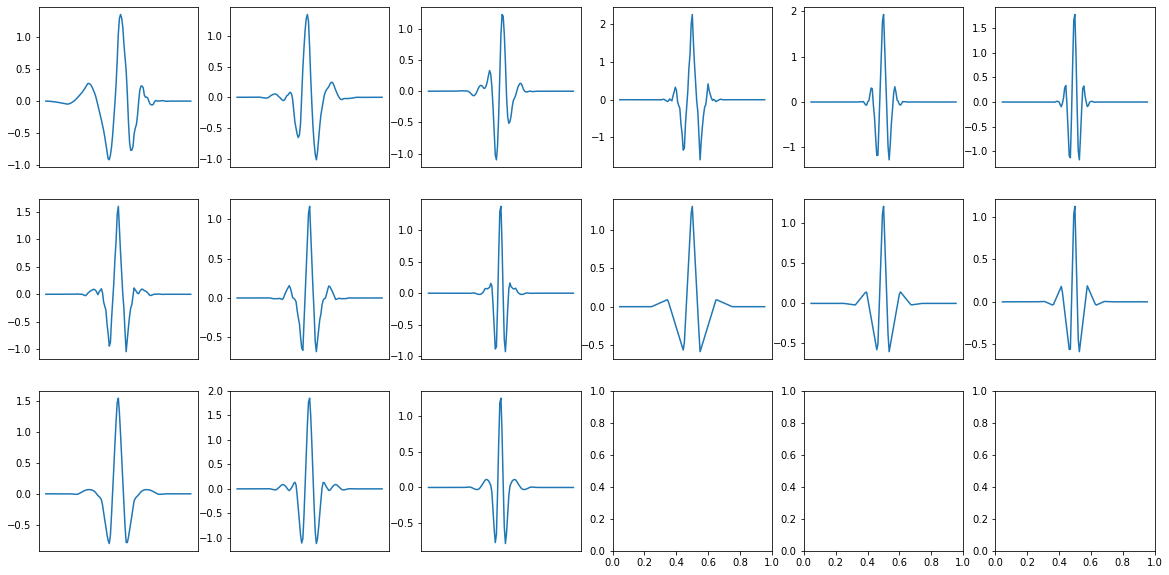

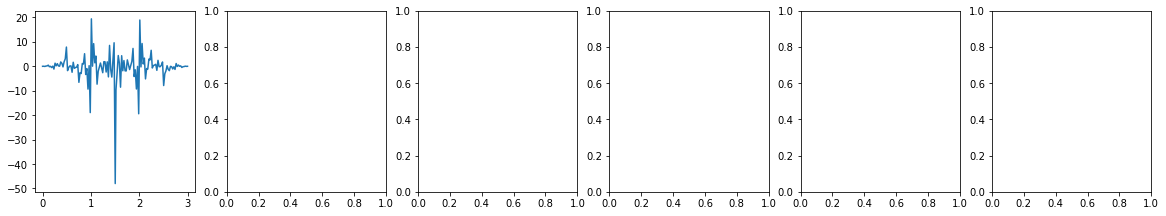

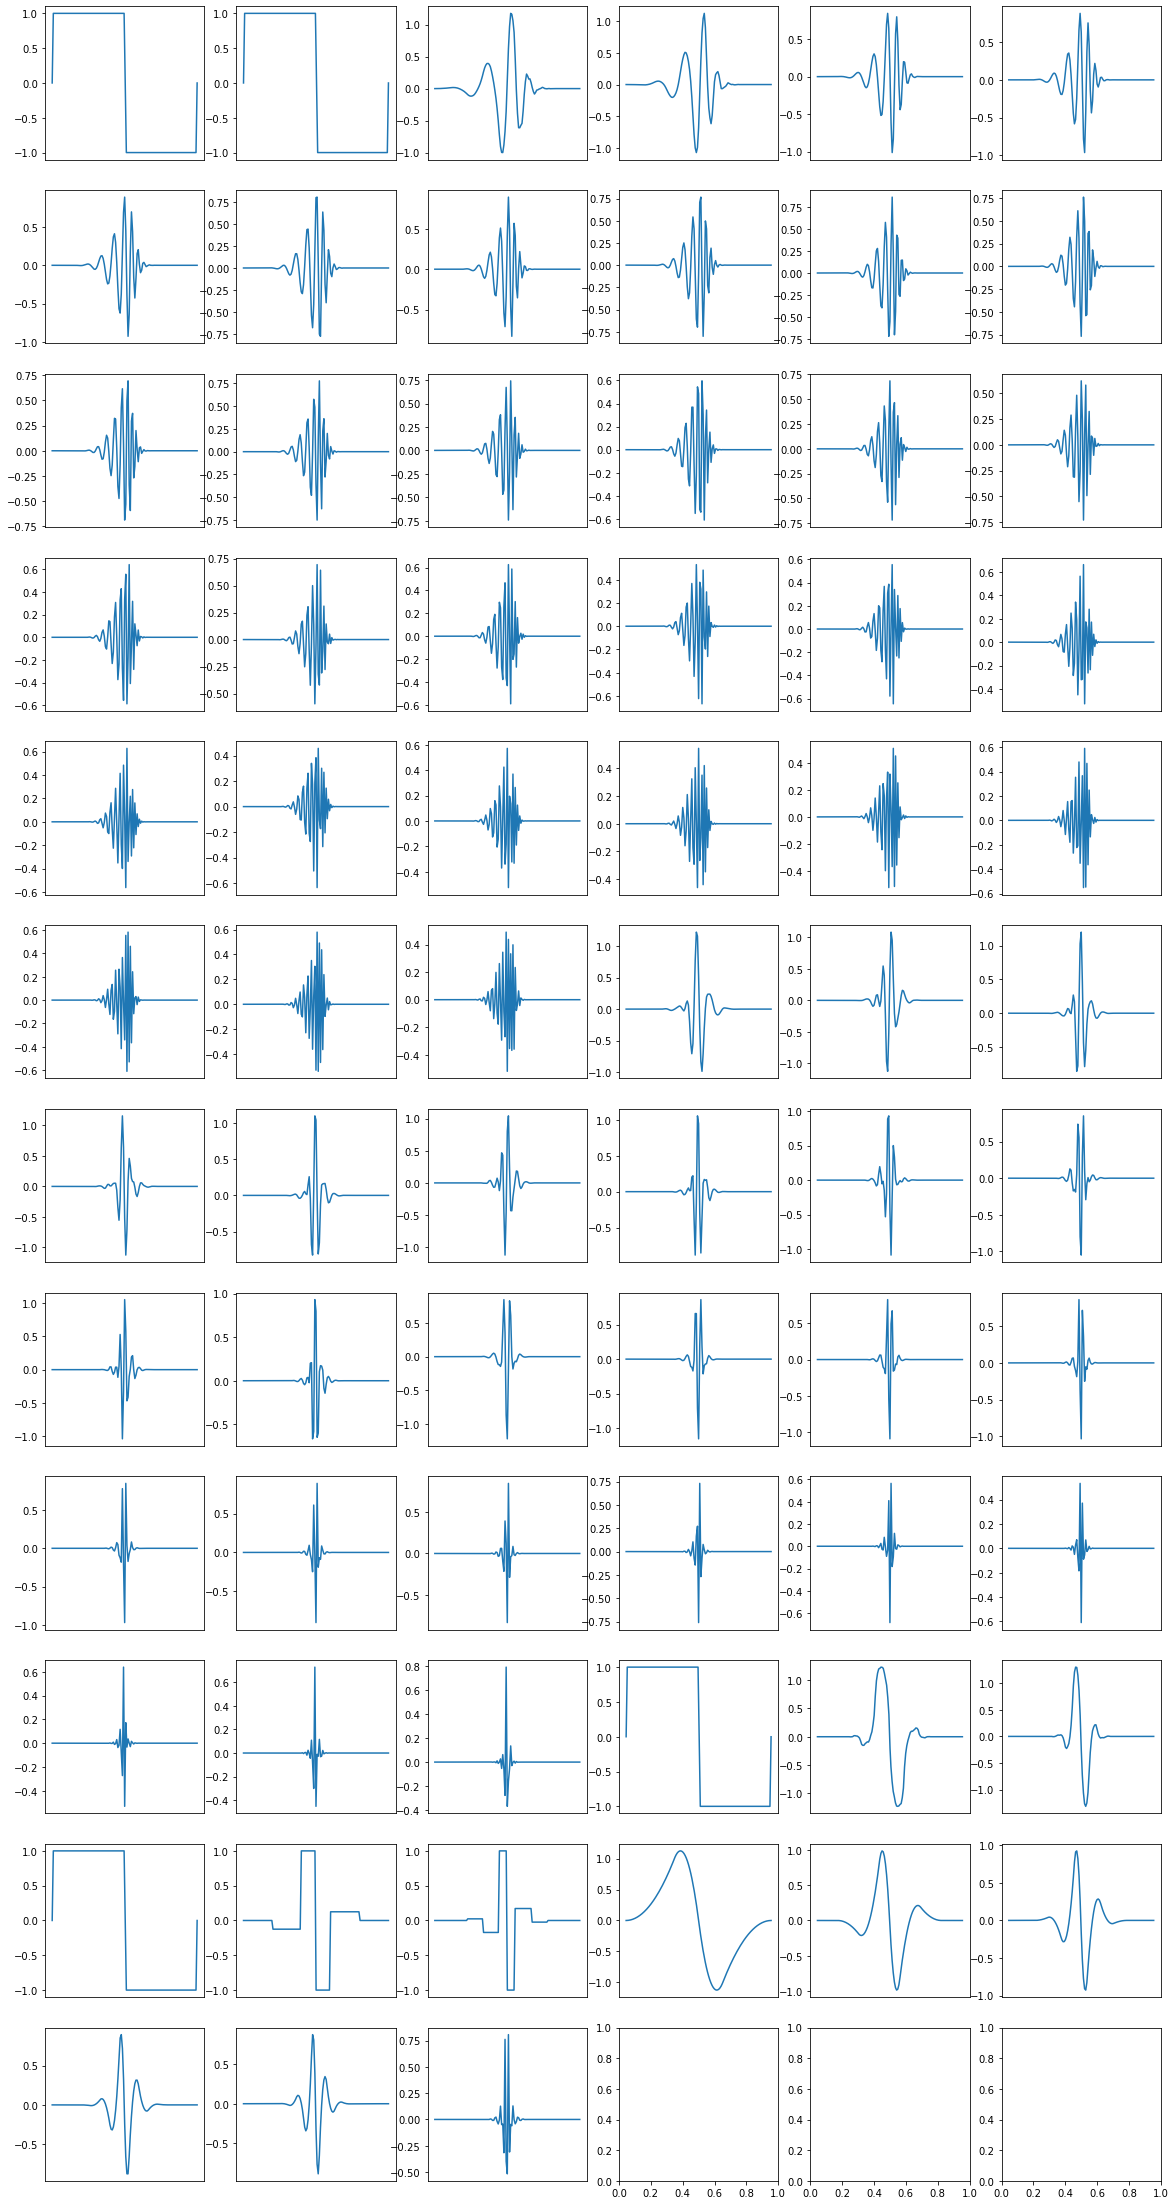

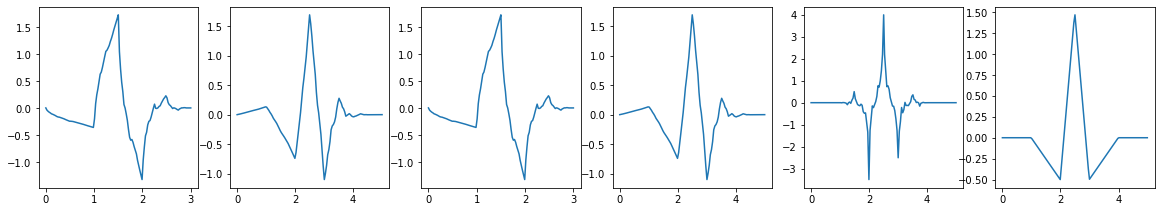

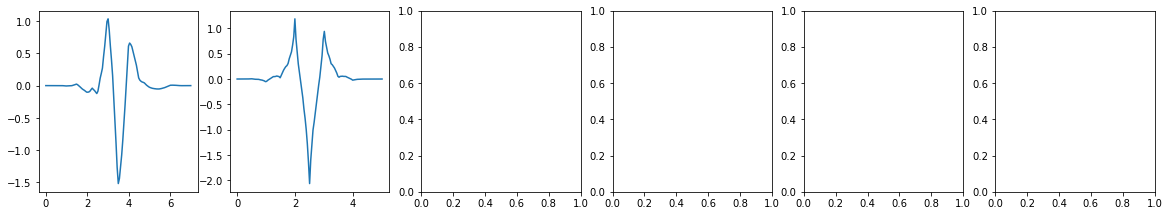

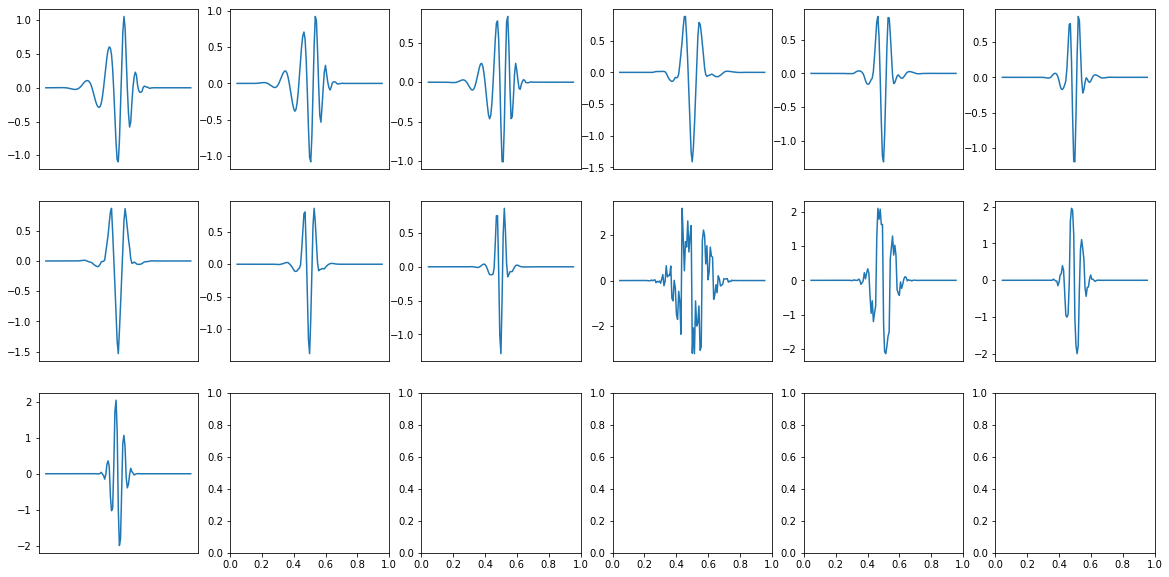

In [14]:
for k in range(best_K):
    wavesidxs = np.where(label==k)[0]
    n_row = np.ceil(len(wavesidxs)/6).astype(int)
    fig, ax = plt.subplots(nrows = n_row, ncols=6, figsize=(20, 20*n_row/6))
    i = 0
    j = 0
    for wavesidx in wavesidxs:
        x = X[wavesidx,:]
        psi = PSI[wavesidx,:]
        if n_row == 1:
            ax[j].plot(x, psi)
        else:
            ax[i,j].plot(x, psi)
            ax[i,j].set_xticks([],[])
        
        j += 1
        if j == 6:
            j = 0
            i += 1
    plt.savefig(f'./figures for filter/4 grouped mothers by both/{k}-th group.pdf', format='pdf', bbox_inches='tight')

# Summary of sec. 2 - sec. 3 in one function

In [16]:
def PrepareWavelets(length=20):
    motherwavelets = []
    for family in pywt.families():
        for mother in pywt.wavelist(family):
            motherwavelets.append(mother)
    
    X = np.zeros([1,length])
    PSI = np.zeros([1,length])
    for mw_temp in motherwavelets:
        if mw_temp.startswith('gaus') or mw_temp.startswith('mexh') or mw_temp.startswith('morl') or mw_temp.startswith('cmor') or mw_temp.startswith('fbsp') or mw_temp.startswith('shan') or mw_temp.startswith('cgau'):
            pass
        else:
            param = pywt.Wavelet(mw_temp).wavefun(level=7)
            psi, x = param[1], param[-1]

            # normalization
            psi_sum = np.sum(psi)
            if np.abs(psi_sum) > 1:
                psi = psi / np.abs(psi_sum)
            x = x / max(x)

            # down sampling
            idx_ds = np.round(np.linspace(0, x.shape[0]-1, length)).astype(int)
            x = x[idx_ds]
            psi = psi[idx_ds]

            X = np.vstack((X, x.reshape(1,-1)))
            PSI = np.vstack((PSI, psi.reshape(1,-1)))

    X = X[1:,:]
    PSI = PSI[1:,:]

    # clustering
    FRE = np.zeros([1,length])
    for i in range(PSI.shape[0]):
        FRE = np.vstack((FRE, np.real(F.fft(PSI[i,:])).reshape(1,-1)))
    FRE = FRE[1:,:]
    PSI_extended = np.hstack((PSI, FRE))

    silhouette_result = np.zeros([2,1]).reshape(2,1)
    for k in range(5, 50):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(PSI_extended)
        label = kmeans.labels_
        silhouette_avg = silhouette_score(PSI_extended, label)
        silhouette_result = np.hstack((silhouette_result, np.array([k,silhouette_avg]).reshape(2,1)))
    
    best_idx = np.argmax(silhouette_result[1,:])
    best_K = int(result[0,best_idx])
    kmeans = KMeans(n_clusters=best_K, random_state=0).fit(PSI_extended)
    label = kmeans.labels_    

    # select one from each cluster
    SelectedWavelet = np.zeros([1,length])
    for k in range(best_K):
        wavesidx = np.where(label==k)[0][0]
        SelectedWavelet = np.vstack((SelectedWavelet, PSI[wavesidx,:]))            

    return torch.tensor(SelectedWavelet[1:,:])

In [17]:
SelectedWavelet = PrepareWavelets(length=129)
best_K = SelectedWavelet.shape[0]
SelectedWavelet.shape

torch.Size([6, 129])

<ipython-input-18-9d130c0501e8>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_xticks([],[])
<ipython-input-18-9d130c0501e8>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_xticks([],[])
<ipython-input-18-9d130c0501e8>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_xticks([],[])
<ipython-input-18-9d130c0501e8>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_xticks([],[])
<ipython

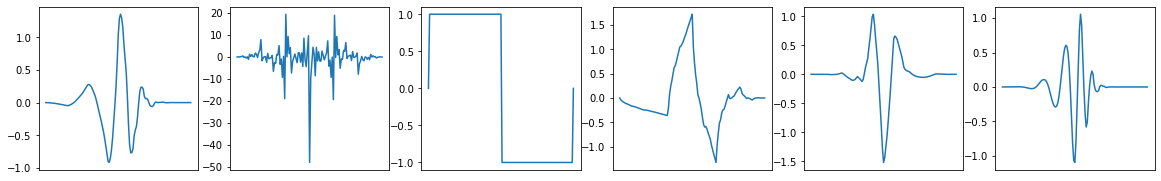

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=best_K, figsize=(20, 3)) #

idx = 0
for i in range(best_K):
        ax[i].plot(SelectedWavelet[idx,:])
        ax[i].set_xticks([],[])
        idx += 1

# Calculate wavelets from their mothers

1. zero padding
2. temporal compression $(t = 2t')$ and amplitude enlargement $(A' = 2A)$
3. formulation of dimensionality to `[n_filters, in_channel=1, H=1, W=windowsize]`

In [19]:
def FiltersExtention(Filters):
    K, WS = Filters.shape
    
    N_ds = int(torch.log2(torch.tensor(WS-1)).floor()) - 2
    N_padding = int((WS-1)/2)
    
    Filter_temp = Filters.repeat(N_ds,1,1)
    m = torch.nn.ConstantPad1d(N_padding, 0)
    
    for n_ds in range(N_ds-1):
        filter_temp = Filter_temp[n_ds,:,:]
        # zero padding
        filter_temp_pad = m(filter_temp)
        # down sampling
        filter_ds = filter_temp_pad[:,::2]
        # save wavelets
        Filter_temp[n_ds+1,:,:] = filter_ds
    
    # formualte dimensionality
    Filter_temp = Filter_temp.view(K*N_ds,WS)
    Filter_temp = Filter_temp.repeat(1,1,1,1)
    Filter_temp = Filter_temp.permute(2,0,1,3)
    
    # normalization
    energy = torch.abs(torch.sum(Filter_temp, dim=3, keepdims=True))
    energy[energy<=1] = 1.
    Filter_temp = Filter_temp / energy
    return Filter_temp

In [20]:
ScaledFilter = FiltersExtention(SelectedWavelet)
ScaledFilter.shape

torch.Size([30, 1, 1, 129])

## Some visualization

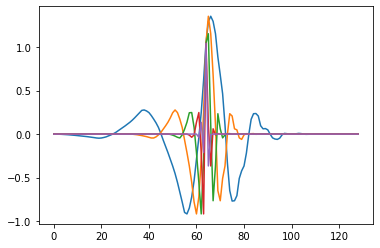

In [21]:
N_scaling = int(ScaledFilter.shape[0]/best_K)
N = 0
for i in range(N_scaling):
    plt.plot(ScaledFilter[N + i * best_K,0,0,:].numpy());

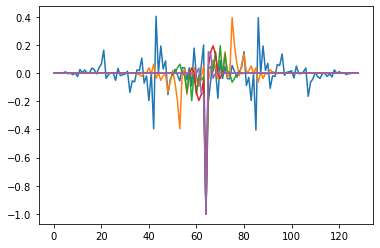

In [22]:
N = 1
for i in range(N_scaling):
    plt.plot(ScaledFilter[N + i * SelectedWavelet.shape[0],0,0,:].numpy());

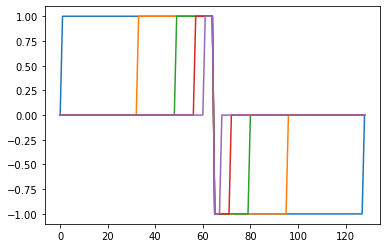

In [23]:
N = 2
for i in range(N_scaling):
    plt.plot(ScaledFilter[N + i * SelectedWavelet.shape[0],0,0,:].numpy());

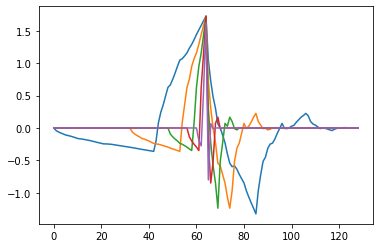

In [24]:
N = 3
for i in range(N_scaling):
    plt.plot(ScaledFilter[N + i * SelectedWavelet.shape[0],0,0,:].numpy());

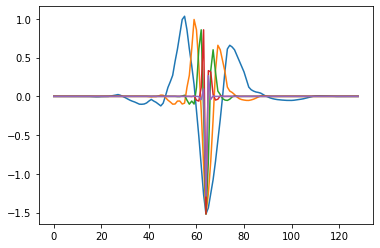

In [25]:
N = 4
for i in range(N_scaling):
    plt.plot(ScaledFilter[N + i * SelectedWavelet.shape[0],0,0,:].numpy());

<ipython-input-26-81be0e7959d6>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_xticks([],[])
<ipython-input-26-81be0e7959d6>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_yticks([],[])
<ipython-input-26-81be0e7959d6>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_xticks([],[])
<ipython-input-26-81be0e7959d6>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_yticks([],[])
<ipython

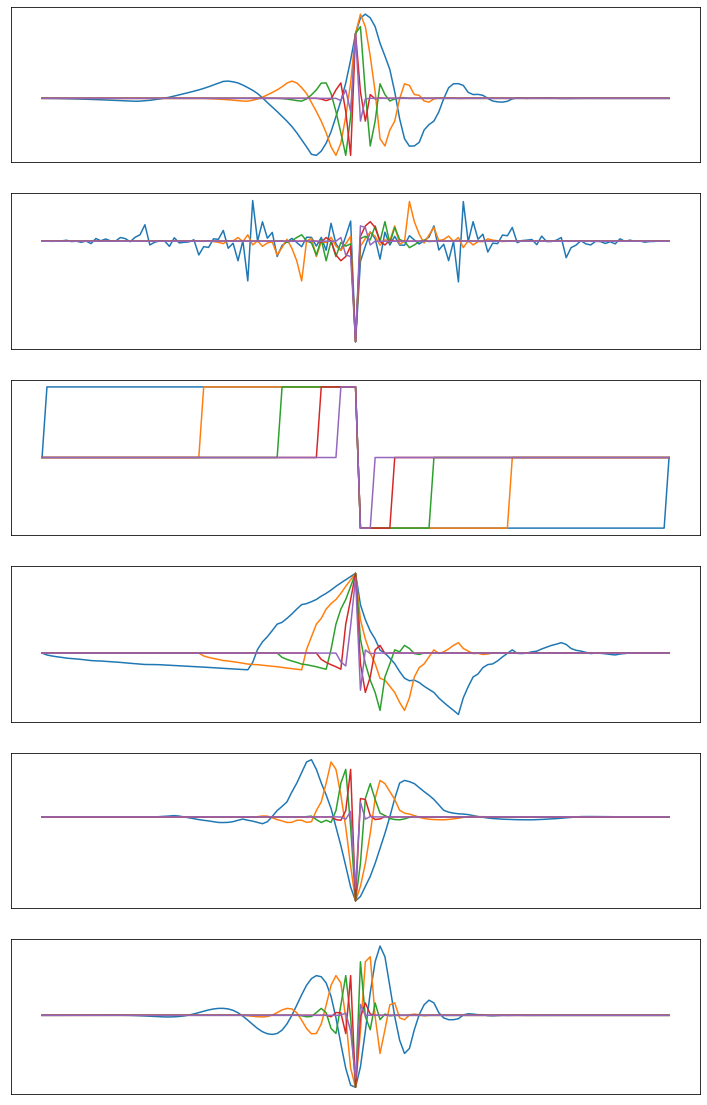

In [26]:
fig, ax = plt.subplots(nrows = best_K, ncols=1, figsize=(20*0.618, 20)) #

for i in range(best_K):
    for j in range(N_scaling):
        ax[i].plot(ScaledFilter[best_K*j+i,0,0,:])
        ax[i].set_xticks([],[])
        ax[i].set_yticks([],[])
#plt.savefig(f'./figures for filter/5 scaled filters.pdf', format='pdf', bbox_inches='tight')

# Formulate data
0. padding
1. Simulate the mini-batch
2. make the data in right form: `[n_batch, n_channel=1, H=n_sensors, W=WindowSize]`

In [62]:
data_x = np.loadtxt(f'./data_temp.txt')
data_x = torch.tensor(data_x)
sample_x = data_x.T
sample_x.shape

torch.Size([6, 129])

In [64]:
data_x.shape

torch.Size([129, 6])

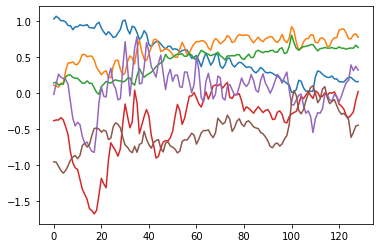

In [56]:
plt.plot(sample_x.T.numpy());

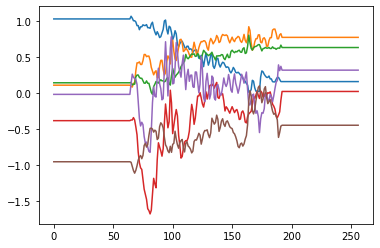

In [57]:

sample_x = np.expand_dims(sample_x,axis=0)
sample_x = torch.tensor(sample_x)

WS = 129
m = torch.nn.ReplicationPad1d(int((WS-1)/2))

sample_x = m(sample_x)

sample_x = sample_x[0]
plt.plot(sample_x.T.numpy());


In [58]:
sample_x = sample_x.repeat(1,1,1)[:,:,:,None]
sample_x = sample_x.permute([0,3,1,2])



In [59]:
sample_x.shape

torch.Size([1, 1, 6, 257])

In [60]:
ScaledFilter.shape

torch.Size([30, 1, 1, 129])

In [61]:
RESULT = torch.nn.functional.conv2d(sample_x, ScaledFilter, padding='valid')[0,:,:,:]
RESULT.shape

torch.Size([30, 6, 129])

In [65]:
a = RESULT.permute(0,2,1)#.shape

In [75]:
b= np.expand_dims(data_x,0)

In [76]:
np.concatenate([a,b],axis=0).shape

(31, 129, 6)

In [74]:
b.shape

(129, 6, 1)

In [49]:
RESULT[0].shape

torch.Size([30, 6, 129])

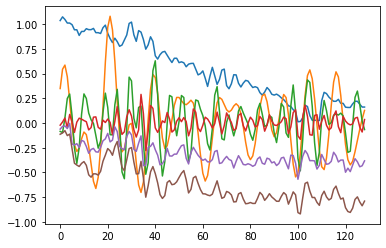

In [50]:
plt.plot(data[0,:].numpy());
for i in range(N_scaling):
    plt.plot(RESULT[0,N_scaling+i*best_K,1,:].numpy());

# Filtering

In [35]:
RESULT = torch.nn.functional.conv2d(data_padded, ScaledFilter, padding='valid')

In [36]:
RESULT.shape

torch.Size([3, 30, 6, 129])

# Visualization

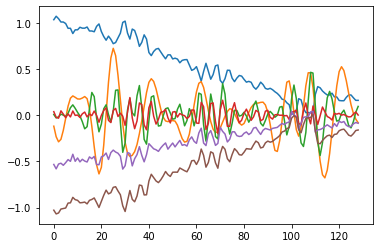

In [37]:
plt.plot(data[0,:].numpy());
for i in range(N_scaling):
    plt.plot(RESULT[0,5+i*best_K,0,:].numpy());